# Adaptability
An SAC agent was trained for 2M timesteps with the following hyperparameters: network shape (64, 64), alpha=0.2, exploration_timesteps=10000, update_frequency_in_episodes=50, update_start_in_episodes=1000. This agent can be found in GROUP_013/results/2022-04-25_21h08m33

This agent was then re-trained at gravities of 0.5x and 2x default for another 1M steps with the following hyperparametes: network shape (64, 64), learned alpha, exploration_timesteps=0, update_frequency_in_episodes=5, update_start_in_episodes=50. This netbook presents a quick analysis of the results.

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import auc

In [2]:
f = open('../../GROUP_013/results/2022-04-25_21h08m33/log.txt')
rewards_05g = f.readlines()
f.close()
f = open('../../GROUP_013/results/2022-04-26_12h17m32/log.txt')
rewards_2g = f.readlines()
f.close()

f = open('../../GROUP_013/results/2022-04-26_10h19m50/log.json')
sample_efficiency_05g = f.readlines()
f.close()
f = open('../../GROUP_013/results/2022-04-26_18h42m43/log.json')
sample_efficiency_2g = f.readlines()
f.close()

In [3]:
rewards_05g = [reward for reward in rewards_05g if 'acc_reward:' in reward]
rewards_05g = np.array([float(reward.split("acc_reward: ", 1)[1][:-2])  for reward in rewards_05g])[0:100]

rewards_2g = [reward for reward in rewards_2g if 'acc_reward:' in reward]
rewards_2g = np.array([float(reward.split("acc_reward: ", 1)[1][:-2])  for reward in rewards_2g])[0:100]

In [4]:
se_05g = []
for i in range(1, 6):
    s = sample_efficiency_05g[i].split("list_of_rewards", 1)[1][4:-3].split(",")
    s = np.array([float(s[i]) for i in range(len(s)) if i%5 == 0])
    se_05g.append(s)
    
se_2g = []
for i in range(1, 6):
    s = sample_efficiency_2g[i].split("list_of_rewards", 1)[1][4:-3].split(",")
    s = np.array([float(ss) for ss in s])
    se_2g.append(s)

In [5]:
print("gravity reduced by half:")
print(f'Final Performance: {np.max(rewards_05g)}')
print(f'Cumulative Training Reward: {np.sum(rewards_05g)}')
print(f'Sample Efficiency: {np.mean(np.array(se_05g))}')
print("")
print("gravity multiplied by 2:")
print(f'Final Performance: {np.max(rewards_2g)}')
print(f'Cumulative Training Reward: {np.sum(rewards_2g)}')
print(f'Sample Efficiency: {np.mean(np.array(se_2g))}')

gravity reduced by half:
Final Performance: 3144.3
Cumulative Training Reward: 171429.99999999997
Sample Efficiency: 921.6890893667311

gravity multiplied by 2:
Final Performance: 3482.0
Cumulative Training Reward: 281791.9999999999
Sample Efficiency: 1480.1561850160492


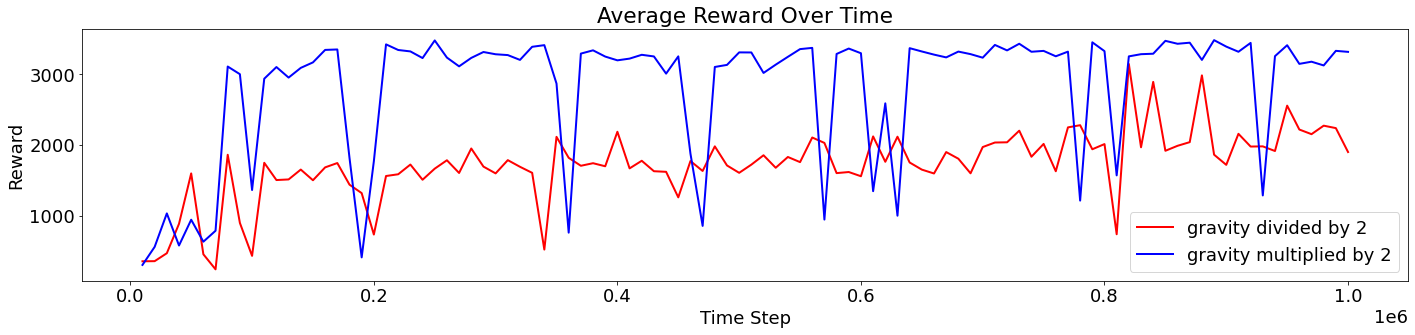

In [6]:
font = {'family' : 'sans serif', 'size' : 18}
matplotlib.rc('font', **font)

_ = plt.figure(figsize=(20, 5))

plt.plot(np.arange(1, 101)*10000, rewards_05g, color = 'r', linewidth=2.0, label='gravity divided by 2')
plt.plot(np.arange(1, 101)*10000, rewards_2g, color = 'b', linewidth=2.0, label='gravity multiplied by 2')

plt.ylabel("Reward")
plt.xlabel("Time Step")
plt.title("Average Reward Over Time")
plt.legend()
plt.tight_layout()
plt.savefig('adaptability_rewards.png', bbox_inches="tight")
plt.show()